# Projeto Tubarões

In [366]:
!pip install pandas

In [367]:
!pip install seaborn

In [368]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt

In [369]:
pd.options.display.max_rows = 1000

In [370]:
#, index_col = 1 - colocar se quiser tirar a coluna denumeração

df=pd.read_csv('attacks.csv', sep=',', encoding='latin-1')

In [371]:
df.shape

(25723, 24)

In [372]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [373]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

# Limpeza de dados

In [374]:
# Limpando as linhas duplicadas

df = df.drop_duplicates()

In [375]:
# Tirando os espaços vazios e colocando tudo em minuscula

df.columns = df.columns.str.strip().str.lower()

In [376]:
#Limpando coluna fatal

df  = df.rename(columns={'fatal (y/n)':'fatal'})

In [377]:
df.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'unnamed: 22',
       'unnamed: 23'],
      dtype='object')

In [378]:
#Limpando as colunas que não vão entrar no meu estudo

df = df.drop(columns=['date','area','activity','case number', 'location',
        'name', 'age', 'injury', 'time','species', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'unnamed: 22',
       'unnamed: 23'])

In [379]:
df

,year,type,country,sex,fatal
0,2018.0,Boating,USA,F,N
1,2018.0,Unprovoked,USA,F,N
2,2018.0,Invalid,USA,M,N
3,2018.0,Unprovoked,AUSTRALIA,M,N
4,2018.0,Provoked,MEXICO,M,N
...,...,...,...,...,...
6307,NaN,NaN,NaN,NaN,NaN
6308,NaN,NaN,NaN,NaN,NaN
6309,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN


In [380]:
#Apagando dados nulos de colunas específicas

df.dropna(subset=['year', 'fatal', 'sex', 'country'], inplace = True)

Limpando a coluna Year

In [381]:
# Transformando o ano em inteiro

df.year = df.year.astype(int)

In [382]:
df

,year,type,country,sex,fatal
0,2018,Boating,USA,F,N
1,2018,Unprovoked,USA,F,N
2,2018,Invalid,USA,M,N
3,2018,Unprovoked,AUSTRALIA,M,N
4,2018,Provoked,MEXICO,M,N
...,...,...,...,...,...
6297,0,Unprovoked,AUSTRALIA,M,Y
6298,0,Unprovoked,AUSTRALIA,M,Y
6299,0,Unprovoked,USA,M,Y
6300,0,Unprovoked,PANAMA,M,Y


In [383]:
df['year'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987,
       1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975,
       1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943,
       1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
       1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921,
       1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899,
       1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888,
       1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877,
       1876, 1875, 1874, 1873, 1872, 1871, 1870, 18

In [384]:
# Selecionando informações maiores que 2008 = 10 anos

df = df.loc[df['year'] > 500]

In [385]:
df

,year,type,country,sex,fatal
0,2018,Boating,USA,F,N
1,2018,Unprovoked,USA,F,N
2,2018,Invalid,USA,M,N
3,2018,Unprovoked,AUSTRALIA,M,N
4,2018,Provoked,MEXICO,M,N
...,...,...,...,...,...
6168,1642,Unprovoked,USA,M,Y
6169,1595,Unprovoked,INDIA,M,UNKNOWN
6170,1580,Unprovoked,Between PORTUGAL & INDIA,M,Y
6172,1554,Unprovoked,FRANCE,M,UNKNOWN


Limpando coluna Type

In [386]:
df['type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       nan, 'Boat', 'Sea Disaster', 'Boatomg'], dtype=object)

In [387]:
df['type'].value_counts()

Unprovoked      4293
Provoked         506
Sea Disaster     161
Boating          100
Boat              30
Invalid           22
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [388]:
# Soma de todos os nulos

df.isna().sum()

year       0
type       3
country    0
sex        0
fatal      0
dtype: int64

In [429]:
df['type'].fillna("Unknown",inplace=True)

In [390]:
df['type'].value_counts()

Unprovoked      4293
Provoked         506
Sea Disaster     161
Boating          100
Boat              30
Invalid           22
Unknown            3
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [431]:
df.loc[df['type'].str.contains('Questionable', case=False, na=False), 'type'] = 'Unknown'
df.loc[df['type'].str.contains('Invalid', case=False, na=False), 'type'] = 'Unknown'
df.loc[df['type'].str.contains('Boat', case=False, na=False), 'type'] = 'Boating'

In [392]:
df['type'].unique()

array(['Boating', 'Unprovoked', 'Unknown', 'Provoked', 'Sea Disaster'],
      dtype=object)

In [393]:
# Soma de todos os nulos

df.isna().sum()

year       0
type       0
country    0
sex        0
fatal      0
dtype: int64

In [394]:
df

,year,type,country,sex,fatal
0,2018,Boating,USA,F,N
1,2018,Unprovoked,USA,F,N
2,2018,Unknown,USA,M,N
3,2018,Unprovoked,AUSTRALIA,M,N
4,2018,Provoked,MEXICO,M,N
...,...,...,...,...,...
6168,1642,Unprovoked,USA,M,Y
6169,1595,Unprovoked,INDIA,M,UNKNOWN
6170,1580,Unprovoked,Between PORTUGAL & INDIA,M,Y
6172,1554,Unprovoked,FRANCE,M,UNKNOWN


Limpando a coluna Country

In [395]:
df['country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'ECUADOR',
       'NEW CALEDONIA', 'MALAYSIA', 'CUBA', 'MAURITIUS', 'NEW ZEALAND',
       'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'REUNION',
       'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'Fiji',
       'DOMINICAN REPUBLIC', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ST. MARTIN', 'FRANCE', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO',
       'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA', 'TAIWAN',
       'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES', 'BELIZE',
       'JAMAICA', 'NIGERIA', 'TONGA', 'SCOTLAND', 'ITALY', 'CHILE',
       'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'AZORES', 'SOUTH KOREA',
       'MALTA', 'VIETNAM', 'MADAGASCAR', 'UNITED ARAB EMIRATES (UAE)',
       'PANAMA', 'SOMALIA', 'CROATIA', 'NORWAY', 'Sierra 

In [396]:
df['country'].value_counts()

USA                                      1943
AUSTRALIA                                1079
SOUTH AFRICA                              452
PAPUA NEW GUINEA                          110
NEW ZEALAND                               102
BAHAMAS                                    99
BRAZIL                                     90
MEXICO                                     70
FIJI                                       53
REUNION                                    52
ITALY                                      48
PHILIPPINES                                44
CUBA                                       38
NEW CALEDONIA                              36
MOZAMBIQUE                                 35
EGYPT                                      32
SPAIN                                      30
INDIA                                      30
PANAMA                                     29
SOLOMON ISLANDS                            27
IRAN                                       25
JAPAN                             

In [397]:
df.columns

Index(['year', 'type', 'country', 'sex', 'fatal'], dtype='object')

In [398]:
country_ft = df["country"].value_counts().sort_values(ascending=False)
country_ft = country_ft[:10]
country_ft

USA                 1943
AUSTRALIA           1079
SOUTH AFRICA         452
PAPUA NEW GUINEA     110
NEW ZEALAND          102
BAHAMAS               99
BRAZIL                90
MEXICO                70
FIJI                  53
REUNION               52
Name: country, dtype: int64

Limpando a coluna Sex

In [399]:
df['sex'].value_counts()

M      4549
F       564
M         2
lli       1
N         1
.         1
Name: sex, dtype: int64

In [400]:
df['sex'].unique()

array(['F', 'M', 'M ', 'lli', 'N', '.'], dtype=object)

In [433]:
df.loc[df['sex'].str.contains('M ', case=False, na=False), 'sex'] = 'M'
df.loc[df['sex'].str.contains('N', case=False, na=False), 'sex'] = 'M'
df.drop(df[df['sex'] == 'lli'].index, inplace=True)
df.drop(df[df['sex'] == '.'].index, inplace=True)


In [402]:
df['sex'].value_counts()

M    4552
F     564
Name: sex, dtype: int64

In [403]:
df.columns

Index(['year', 'type', 'country', 'sex', 'fatal'], dtype='object')

In [404]:
df

,year,type,country,sex,fatal
0,2018,Boating,USA,F,N
1,2018,Unprovoked,USA,F,N
2,2018,Unknown,USA,M,N
3,2018,Unprovoked,AUSTRALIA,M,N
4,2018,Provoked,MEXICO,M,N
...,...,...,...,...,...
6168,1642,Unprovoked,USA,M,Y
6169,1595,Unprovoked,INDIA,M,UNKNOWN
6170,1580,Unprovoked,Between PORTUGAL & INDIA,M,Y
6172,1554,Unprovoked,FRANCE,M,UNKNOWN


Limpando a coluna Fatal

In [405]:
df['fatal'].value_counts()

N          3866
Y          1203
UNKNOWN      37
 N            7
M             1
2017          1
y             1
Name: fatal, dtype: int64

In [406]:
df['fatal'].unique()

array(['N', 'Y', 'M', 'UNKNOWN', '2017', ' N', 'y'], dtype=object)

In [434]:
df.loc[df['fatal'].str.contains('M', case=False, na=False), 'fatal'] = 'N'
df.loc[df['fatal'].str.contains(' N', case=False, na=False), 'fatal'] = 'N'
df.loc[df['fatal'].str.contains('y', case=False, na=False), 'fatal'] = 'Y'
df.drop(df[df['fatal'] == '2017'].index, inplace=True)
df.drop(df[df['fatal'] == 'UNKNOWN'].index, inplace=True)

In [408]:
df['fatal'].value_counts()

N    3874
Y    1204
Name: fatal, dtype: int64

In [409]:
df

,year,type,country,sex,fatal
0,2018,Boating,USA,F,N
1,2018,Unprovoked,USA,F,N
2,2018,Unknown,USA,M,N
3,2018,Unprovoked,AUSTRALIA,M,N
4,2018,Provoked,MEXICO,M,N
...,...,...,...,...,...
6162,1700,Unprovoked,FRANCE,M,N
6163,1700,Unprovoked,BARBADOS,M,Y
6168,1642,Unprovoked,USA,M,Y
6170,1580,Unprovoked,Between PORTUGAL & INDIA,M,Y


# Analises

In [410]:
# Função base para gráfico histograma

def histogram(column, worksheet):
    plt.figure(figsize=(10,3))
    grafico = sns.countplot(column,  data = worksheet, order = worksheet[column].value_counts().index)
    grafico.tick_params(axis='x', rotation = 90)

In [411]:
# Armazenando Filtro de acidentes fatais

y = df[df['fatal'] == 'Y']

Análise de casos e fatalidade

In [412]:
# Total acidentes total

df['fatal'].count()

5078

In [413]:
# Porcentagem de acidentes fatais e não

fatal_y= (df['fatal']=='Y').sum()
fatal_n= (df['fatal']=='N').sum()
print('Fatal: =',(df['fatal']=='Y').mean().round(4)*100,'%') 
print('Não Fatal =',(df['fatal']=='N').mean().round(4)*100,'%')

Fatal: = 23.71 %
Não Fatal = 76.29 %


In [414]:
# Quantidade de acidentes fatais e não

df.groupby(['fatal'])[['fatal']].count()

,fatal
fatal,
N,3874
Y,1204


C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


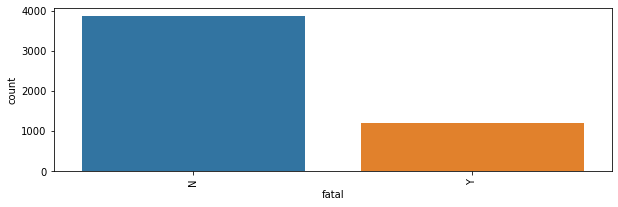

In [415]:
histogram('fatal', df)

Análise do tipo de atividade

In [416]:
# Total de ataques por modalidade

df['type'].value_counts()

Unprovoked      4259
Provoked         503
Sea Disaster     160
Boating          130
Unknown           26
Name: type, dtype: int64

C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


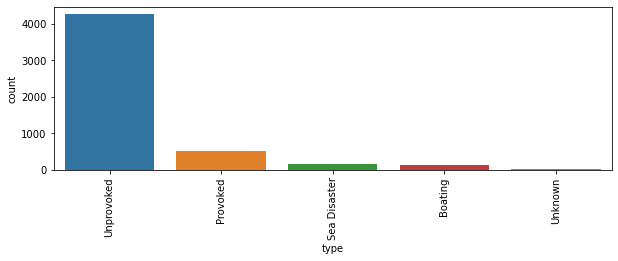

In [417]:
histogram('type', df)

In [418]:
# Tipos de modalidade com fatalidade

y.groupby(['type'])[['fatal']].count()

,fatal
type,
Boating,8
Provoked,16
Sea Disaster,106
Unknown,9
Unprovoked,1065


C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


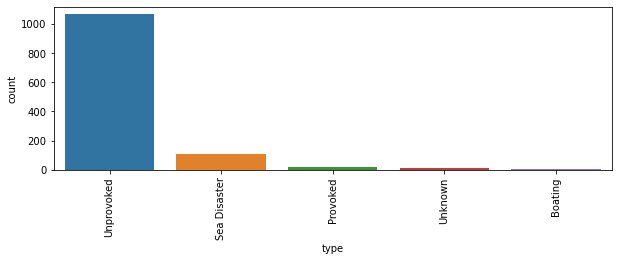

In [419]:
histogram('type', y)

Análise da localidade

In [420]:
# Os 8 lugares com mais ataques de tubarões nos últimos anos

df2 = df["country"].value_counts().sort_values(ascending=False)
df2[:8]

USA                 1928
AUSTRALIA           1071
SOUTH AFRICA         450
PAPUA NEW GUINEA     109
NEW ZEALAND          102
BAHAMAS               99
BRAZIL                89
MEXICO                70
Name: country, dtype: int64

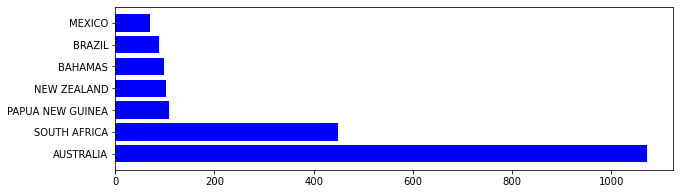

In [421]:
plt.figure(figsize=(10,3))
plt.grid(False)
plt.barh(df2[1:8].index,df2[1:8].values, color="blue")
plt.show()

In [422]:
# Acidentes fatais por localidade

y.groupby(['country'])[['fatal']].count().sort_values(by='fatal')

,fatal
country,
PHILIPPINES,1
EL SALVADOR,1
EQUATORIAL GUINEA / CAMEROON,1
SOUTHWEST PACIFIC OCEAN,1
MONTENEGRO,1
Fiji,1
GABON,1
GHANA,1
GUAM,1


In [423]:
# Os lugares com menos ataques de tubarões nos últimos 10 anos

df['country'].value_counts().tail()

SAUDI ARABIA                1
NETHERLANDS ANTILLES        1
EGYPT / ISRAEL              1
ARGENTINA                   1
Between PORTUGAL & INDIA    1
Name: country, dtype: int64

Analise sa relação do genero com os ataques

In [424]:
# Total de acidentes por gênero

df['sex'].value_counts()

M    4518
F     560
Name: sex, dtype: int64

C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


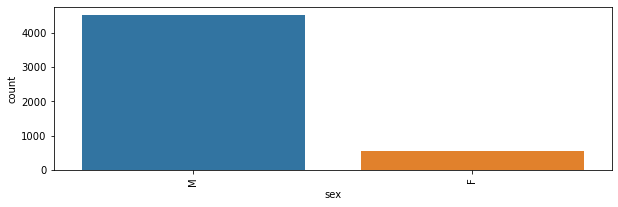

In [425]:
histogram('sex', df)

In [426]:
# Aciidentes fatais por gênero

y.groupby(['sex'])[['fatal']].count().sort_values(by='fatal')

,fatal
sex,
F,103
M,1101


C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


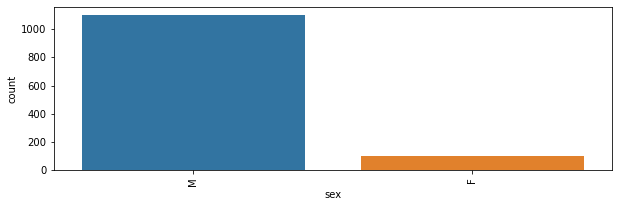

In [427]:
histogram('sex', y)

# Resultado baseado nas análises

Com as analises podemos perceber, que nos últimos 465 anos tivemos por volta de 5.078 ataques de tubarões de diversas espécies pelo mundo.

Mesmo sendo um número alto de ataques, podemos perceber que somente 3.874, equivalente a 76,29 % deles foram fatais. Essa discrepancia se dá, tendo em vista que a carne humana não esta na lista de refeições preferidas dos tubarões, e esses ataques acontecem na maior parte das vezes, por curiosidade do animal mesmo.

Existem alguns estudos que acreditam até que a cor da roupa ultizada pelos banhistas ou as pranchas dos própiros surfistas possam provocar algum dos ataques, mas nada até o momento comprovado.

No meu estudo também não consegui perceber nenhum parâmetro de ataque de acordo com a atividade exercida na água.

Pude identificar também que a maior concentração de ataques ocorreram nos EUA, que teve um total de 1.928, mas somente 273 foram fatais e Australia com 1.071 ataques totais, mas somente 180 fatais.

Na última parte do estudo fiz uma análise pra saber se o gênero das vítimas e pude contatar que os homems são a grande maioria das vítimas total quanto fatais.

No final desse estudo entendemos que os piores liugares para se abrir um Resort baseados nas iformações que temos seria os EUA e Autralia e que os melhores lugares para se pensar fossem Maldivas e Inglaterra.